# Target analysis
**Purpose**:
* put features into context with predicted or actual target values
  * analyse feature distribution per group in binary classification
  * check correlation of features with target value
* check 'certainty' of the model predictions by plotting `prob_distrib_per_class` to see how certain the model is in predicting each class
* visually check predicted vs actual(ground truth values)
  * by simple scatter plot
  * by 'improved scatter plot' (`joint_dist`) - this can be usefull if the actual values form a cluster (eg. regression applied to clusters of users) and we want check if the model predictions also form a nice cluster with similar distribution as actual values

**Intended use**:
* check how your model is perfroming
* check the possible connection between feature and target values (eg. if the distributions of features are different for each class)

## Imports

In [1]:
import os
import sys

sys.path.append(os.getcwd())
os.chdir("../..")

import pandas as pd
from churn_pred.eda.target.analysis import correlation
from churn_pred.eda.target.plotting import (
    distributions_in_binary_cls,
)

## Dataset

In [2]:
df_pd = pd.read_parquet("data/dataset_auxiliary_features_cleaned.parquet")
df_pd.head()

,CustomerId,CreditScore,Country,Gender,Age,Tenure,Balance (EUR),NumberOfProducts,HasCreditCard,IsActiveMember,...,Country_subregion,is_native,Country_hemisphere,Country_gdp_per_capita,Country_IncomeGroup,Surname_Country_gdp_per_capita,Surname_Country_IncomeGroup,working_class,stage_of_life,generation
0,15787619,844,France,Male,18,2,160980.03,1,0,0,...,Western Europe,0,northern,57594.03402,High income,32756.00000,None,working_age,teen,gen_z
1,15770309,656,France,Male,18,10,151762.74,1,0,1,...,Western Europe,0,northern,57594.03402,High income,76329.58227,High income,working_age,teen,gen_z
2,15569178,570,France,Female,18,4,82767.42,1,1,0,...,Western Europe,0,northern,57594.03402,High income,34637.76172,Upper middle income,working_age,teen,gen_z
3,15795519,716,Germany,Female,18,3,128743.80,1,0,0,...,Western Europe,0,northern,66616.02225,High income,34637.76172,Upper middle income,working_age,teen,gen_z
4,15621893,727,France,Male,18,4,133550.67,1,1,1,...,Western Europe,0,northern,57594.03402,High income,55442.07843,High income,working_age,teen,gen_z


In [3]:
target_col = "Exited"
id_cols = ["CustomerId"]
cat_cols = [
    "Country",
    "Gender",
    "HasCreditCard",
    "IsActiveMember",
    "CustomerFeedback_sentiment3",
    "CustomerFeedback_sentiment5",
    "Surname_Country",
    "Surname_Country_region",
    "Surname_Country_subregion",
    "Country_region",
    "Country_subregion",
    "is_native",
    "Country_hemisphere",
    "Country_IncomeGroup",
    "Surname_Country_IncomeGroup",
    "working_class",
    "stage_of_life",
    "generation",
]
cont_cols = df_pd.drop(
    columns=id_cols + cat_cols + [target_col]
).columns.values.tolist()

In [4]:
df_pd[cat_cols] = df_pd[cat_cols].astype(str)

### Analysis

Age                               0.285323
Country_gdp_per_capita            0.139180
Balance (EUR)                     0.118533
EstimatedSalary                   0.012097
Surname_Country_gdp_per_capita    0.002470
Name: Exited, dtype: float64

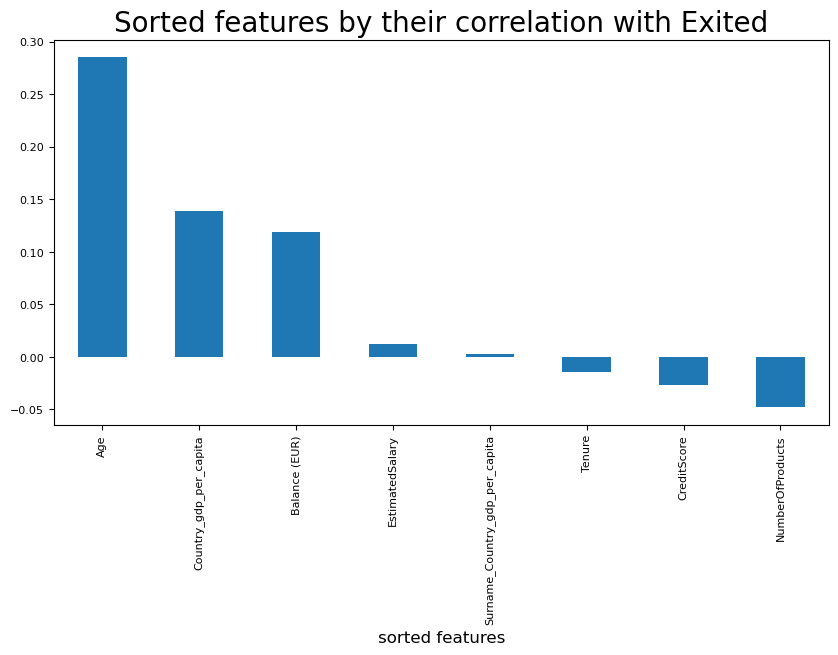

In [5]:
sorted_corr_cols, fig = correlation(
    df=df_pd[cont_cols],
    target=df_pd[target_col],
    scale="linear",
    plot=True,
)

sorted_corr_cols.head()

### Plotting
Predicted and actual/ground_truth values were gathered using LightGBM with Optuna optimizer on the dataset

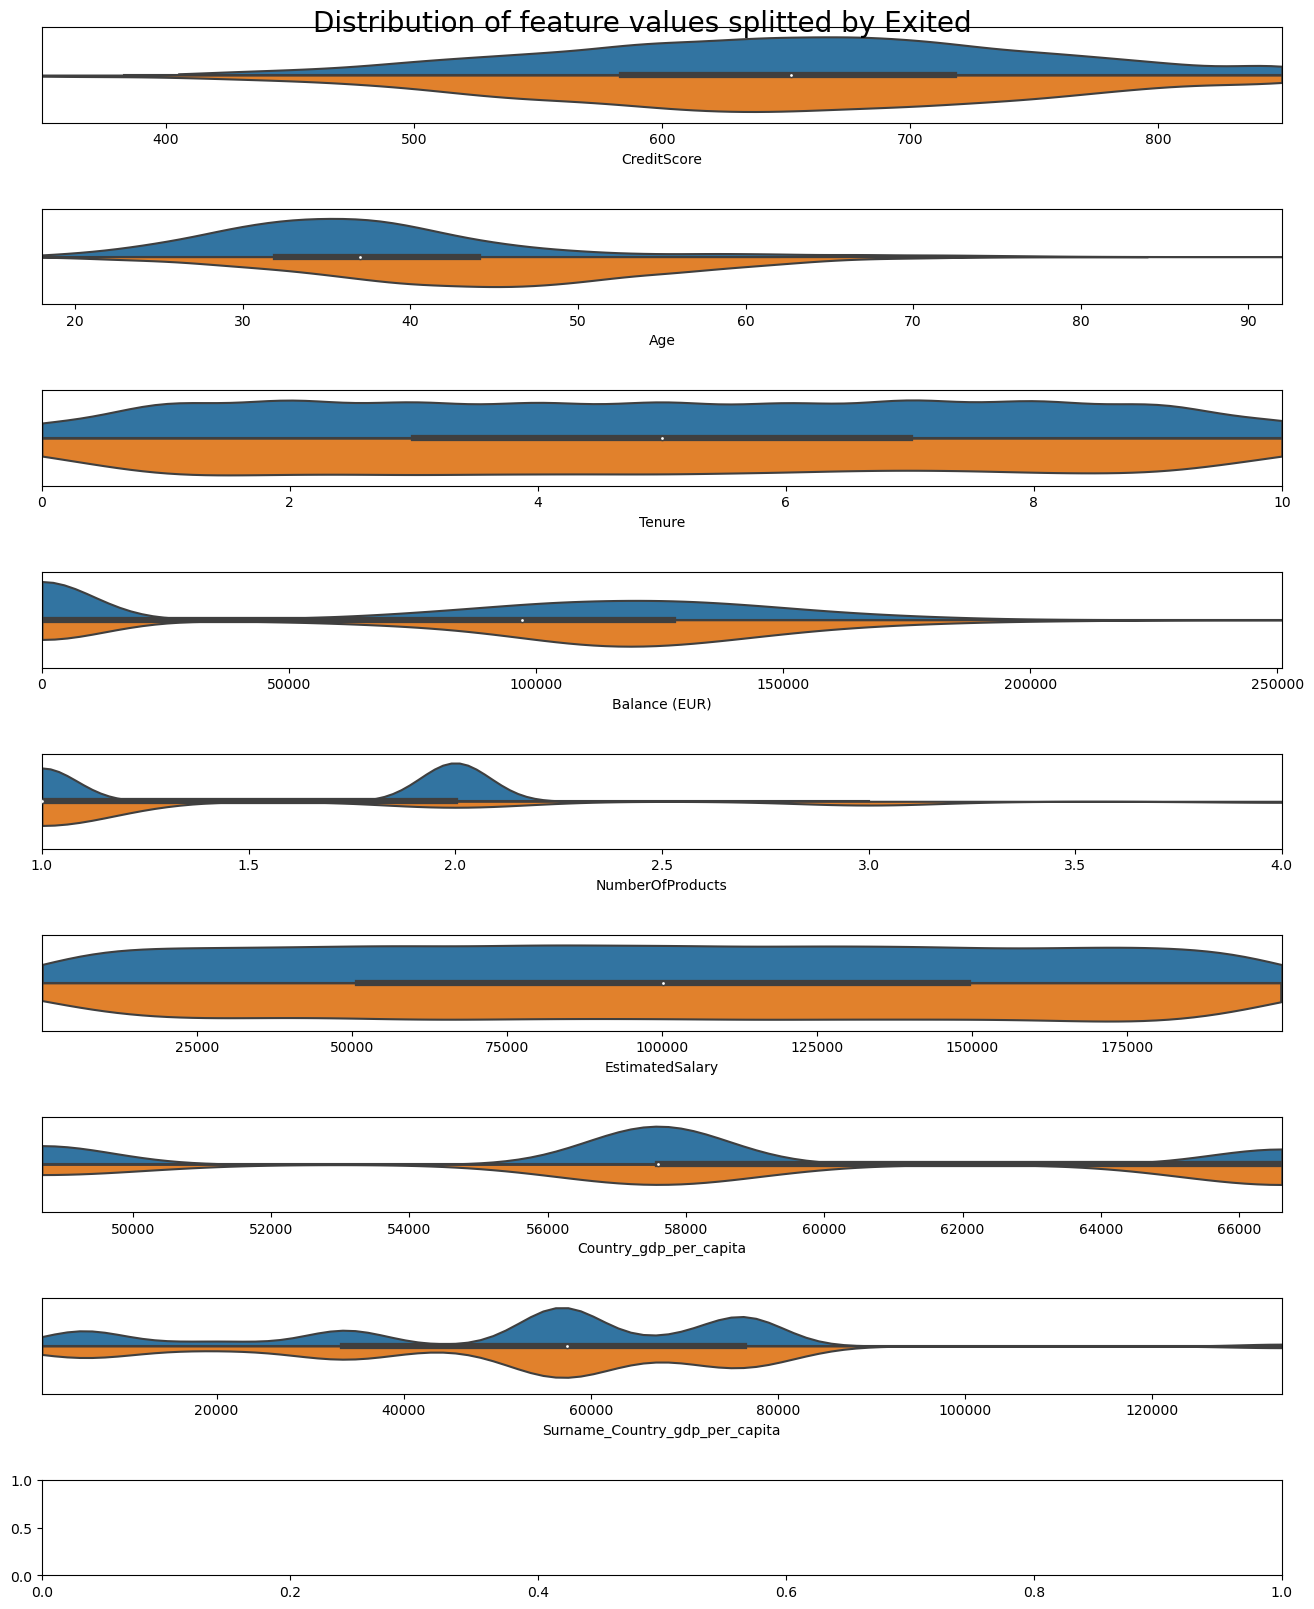

In [6]:
fig = distributions_in_binary_cls(
    df=df_pd[cont_cols],
    target=df_pd[target_col],
    low_per_cut=0,
    high_per_cut=1,
)